In [1]:
%pylab inline  
import GPy
import GPyOpt
from numpy.random import seed
import matplotlib
pyplot.set_cmap('jet')

Populating the interactive namespace from numpy and matplotlib


## Introduction
In the following, we apply Bayesian optimisation and a genetic algorithm to a 2-dimensional benchmark problem, the Branin-Hoo function. 

__Reference__: http://nbviewer.jupyter.org/github/SheffieldML/GPyOpt/blob/master/manual/GPyOpt_reference_manual.ipynb

## Initialise objective function

Note that this function has three global minimum: $(-\pi,12.275)$, $(\pi,2.275)$ and $(9.42478,2.475)$. <br> The optimal objective function value is given by $f(x_{\text{opt}})=0.397887$.

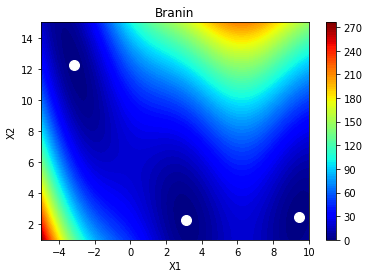

In [2]:
# create the objective function
f_true = GPyOpt.objective_examples.experiments2d.branin()
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': f_true.bounds[0]},
         {'name': 'var_2', 'type': 'continuous', 'domain': f_true.bounds[1]}]
f_true.plot()

## Using BayesOpt

In [3]:
myOpt = GPyOpt.methods.BayesianOptimization(f_true.f,
                                            domain=bounds,
                                            model_type = 'GP',
                                            acquisition_type='EI',  
                                            normalize_Y = True)    

In [4]:
max_iter = 40  # maximum time 40 iterations
max_time = 60  # maximum time 60 seconds

myOpt.run_optimization(max_iter,max_time,verbosity=False)   

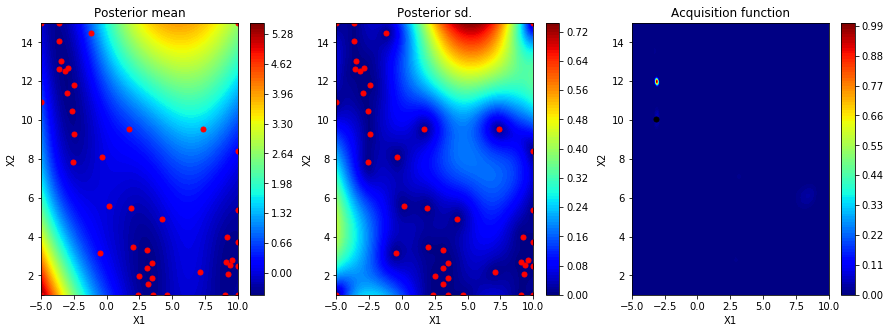

In [5]:
myOpt.plot_acquisition() 

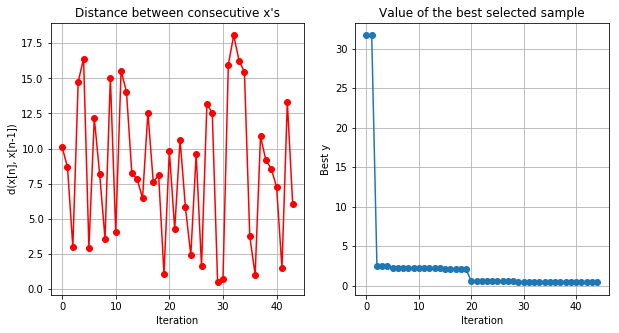

In [6]:
myOpt.plot_convergence()

In [7]:
# Obtaining the optimal results 
min_index = np.argmin(myOpt.Y)
x_best = myOpt.X[min_index,:]
y_best = myOpt.Y[min_index,:]
print("Optimal x = {}".format(x_best))
print("Optimal y = {}".format(y_best))

Optimal x = [ 9.39693824  2.51375309]
Optimal y = [ 0.4054691]


## Using PyGMO

In [8]:
print("Parameter bounds: ")
print(f_true.bounds[0],f_true.bounds[1])

Parameter bounds: 
((-5, 10), (1, 15))


In [9]:
import pygmo as pg

In [10]:
# User defined problem
class user_defined_problem:
    def __init__(self, f):
        self.f = f
    def fitness(self, x):
        return self.f(x).flatten()
    def get_bounds(self):
        return ([-5,1], [10,15])

In [11]:
prob = pg.problem(user_defined_problem(f_true.f))

In [12]:
algo = pg.algorithm(pg.bee_colony(gen = 20, limit = 20))
pop = pg.population(prob,10)
pop = algo.evolve(pop)

In [13]:
print("Optimal x = {}".format(pop.champion_x))
print("Optimal y = {}".format(pop.champion_f))

Optimal x = [ 3.1444021   2.26540325]
Optimal y = [ 0.39798011]
